# 12. 시계열 데이터

## 12.1. datetime 오브젝트
- datetime library 내 object
- ex. date/time/datetime object....

In [1]:
from datetime import datetime

In [2]:
now1 = datetime.now()
print(now1)

2024-08-27 15:02:18.212822


In [3]:
now2 = datetime.today()
print(now2)

2024-08-27 15:02:18.229213


In [4]:
t1 = datetime.now()
t2 = datetime(1970, 1, 1) # 00시로 출력
t3 = datetime(1970, 12, 12, 13, 24, 34) # 시간 설정
print(t1)
print(t2)
print(t3)

2024-08-27 15:02:18.256135
1970-01-01 00:00:00
1970-12-12 13:24:34


In [5]:
# 시간 계산 가능
diff1 = t1 - t2
print(diff1)
print(type(diff1))

19962 days, 15:02:18.256135
<class 'datetime.timedelta'>


In [6]:
diff2 = t2 - t1
print(diff2)
print(type(diff2))

-19963 days, 8:57:41.743865
<class 'datetime.timedelta'>


### 12.1.1. datetime object로 변환하기 - to_datetime method

In [7]:
import pandas as pd
import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/country_timeseries.csv')

In [10]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [11]:
# Date column의 object type에서 datetetime object로 변환하고, 새로운 열로 지정
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [12]:
# 시간 형식 지정자를 적절히 조합
test_df1 = pd.DataFrame({'order_day':['01/01/15', '02/01/15', '03/01/15']})
test_df1['date_dt1'] = pd.to_datetime(test_df1['order_day'], format='%d/%m/%y')
test_df1['date_dt2'] = pd.to_datetime(test_df1['order_day'], format='%m/%d/%y')
test_df1['date_dt3'] = pd.to_datetime(test_df1['order_day'], format='%y/%m/%d')
print(test_df1)

  order_day   date_dt1   date_dt2   date_dt3
0  01/01/15 2015-01-01 2015-01-01 2001-01-15
1  02/01/15 2015-01-02 2015-02-01 2002-01-15
2  03/01/15 2015-01-03 2015-03-01 2003-01-15


In [13]:
test_df2 = pd.DataFrame({'order_day':['01-01-15', '02-01-15', '03-01-15']}) # object
test_df2['date_dt'] = pd.to_datetime(test_df2['order_day'], format='%d-%m-%y') # format 지정
print(test_df2)

  order_day    date_dt
0  01-01-15 2015-01-01
1  02-01-15 2015-01-02
2  03-01-15 2015-01-03


### 12.1.2. 시간 형식 지정자
| 시간 형식 지정자 | 의미                                         | 결과                                       |
|-----------------|--------------------------------------------|--------------------------------------------|
| %a              | 요일 출력                                     | Sun, Mon, ..., Sat                         |
| %A              | 요일 출력(긴 이름)                             | Sunday, Monday, ..., Saturday              |
| %w              | 요일 출력(숫자, 0부터 일요일)                  | 0, 1, ..., 6                               |
| %d              | 날짜 출력(2자리로 표시)                         | 01, 02, ..., 31                            |
| %b              | 월 출력                                       | Jan, Feb, ..., Dec                         |
| %B              | 월 출력(긴 이름)                               | January, February, ..., December           |
| %m              | 월 출력(숫자)                                  | 01, 02, ..., 12                            |
| %y              | 년 출력(2자리로 표시)                          | 00, 01, ..., 99                            |
| %Y              | 년 출력(4자리로 표시)                          | 0001, 0002, ..., 2013, 2014, ..., 9999     |
| %H              | 시간 출력(24시간)                              | 00, 01, ..., 23                            |
| %I              | 시간 출력(12시간)                              | 01, 02, ..., 12                            |
| %p              | AM 또는 PM 출력                                | AM, PM                                     |
| %M              | 분 출력(2자리로 표시)                          | 00, 01, ..., 59                            |
| %S              | 초 출력(2자리로 표시)                          | 00, 01, ..., 59                            |
| %f              | 마이크로초 출력                                | 000000, 000001, ..., 999999                |
| %z              | UTC 차이 출력(+HHMM이나 -HHMM 형태)            | (None), +0000, -0400, +1030                |
| %Z              | 기준 지역 이름 출력                            | (None), UTC, EST, CST                      |
| %j              | 올해에 지난 일 수 출력(1일, 2일, ...)           | 001, 002, ..., 366                         |
| %U              | 올해에 지난 주 수 출력(1주, 2주, ...)           | 00, 01, ..., 53                            |
| %c              | 날짜와 시간 출력                               | Tue Aug 16 21:30:00 1988                   |
| %x              | 날짜 출력                                      | 08/16/88 (None), 08/16/1988                |
| %X              | 시간 출력                                      | 21:30:00                                   |
| %G              | 년 출력(ISO 8601 형식)                         | 0001, 0002, ..., 2013, 2014, ..., 9999     |
| %u              | 요일 출력(ISO 8601 형식)                        | 1, 2, ..., 7                               |
| %V              | 올해에 지난 주 수 출력(ISO 8601 형식)            | 01, 02, ..., 53                            |


In [14]:
# 시계열 데이터 부분 추출하기
now = datetime.now()
print(now, '\n')

nowDate = now.strftime('%Y-%m-%d')
print(nowDate, '\n')

nowTime = now.strftime('%H:%M:%S')
print(nowTime, '\n')

nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime)

2024-08-27 15:03:49.460635 

2024-08-27 

15:03:49 

2024-08-27 15:03:49


### 12.1.3. datetime object로 변환하기 - read_csv method

In [15]:
# parse_dates parameter 설정
ebola1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/country_timeseries.csv', parse_dates=['Date'])
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

### 12.1.4. datetime object에서 날짜 정보 추출하기

In [16]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series)
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [17]:

print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2018
5
16


### 12.1.5. dt 접근자 사용하기

In [18]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/country_timeseries.csv')
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [19]:
# dt 접근자 사용 X
print(ebola[['Date', 'date_dt']].head())
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)

         Date    date_dt
0    1/5/2015 2015-01-05
1    1/4/2015 2015-01-04
2    1/3/2015 2015-01-03
3    1/2/2015 2015-01-02
4  12/31/2014 2014-12-31
2015
1
2


In [20]:
# dt 접근자 사용 - date_dt 열에 한 번에 접근
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [21]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)
print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [22]:
# year, month, date는 정수형
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## 12.2. 사례별 시계열 데이터 계산하기

에볼라 최초 발병일 계산

In [23]:
print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [24]:
print(ebola['date_dt'].min())
print(type(ebola['date_dt'].min())) # timestamp - datetime 오브젝트와 호환

2014-03-22 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [25]:
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min() # day로 저장되어 있음.
print(ebola[['Date', 'Day', 'outbreak_d']].head())

         Date  Day outbreak_d
0    1/5/2015  289   289 days
1    1/4/2015  288   288 days
2    1/3/2015  287   287 days
3    1/2/2015  286   286 days
4  12/31/2014  284   284 days


파산한 은행의 개수 계산

In [26]:
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/banklist.csv')
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  
0                   Royal Savings Bank    15-Dec-17    20-Dec-17  
1                          Conway Bank    13-Oct-17    20-Oct-17  
2            United Fidelity Bank, fsb    26-May-17    26-Jul-17  
3  First-Citizens Bank & Trust Company     5-May-17    26-Jul-17  
4                         Whitney Bank    28-Apr-17     5-Dec-17  


In [27]:
banks_no_dates = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/banklist.csv')
print(banks_no_dates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Bank Name              555 non-null    object
 1   City                   555 non-null    object
 2   ST                     555 non-null    object
 3   CERT                   555 non-null    int64 
 4   Acquiring Institution  555 non-null    object
 5   Closing Date           555 non-null    object
 6   Updated Date           555 non-null    object
dtypes: int64(1), object(6)
memory usage: 30.5+ KB
None


In [28]:
banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/banklist.csv', parse_dates=[5,6])
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              555 non-null    object        
 1   City                   555 non-null    object        
 2   ST                     555 non-null    object        
 3   CERT                   555 non-null    int64         
 4   Acquiring Institution  555 non-null    object        
 5   Closing Date           555 non-null    datetime64[ns]
 6   Updated Date           555 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.5+ KB
None


<ipython-input-28-9c8ffc179f03>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/banklist.csv', parse_dates=[5,6])
<ipython-input-28-9c8ffc179f03>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  banks = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/banklist.csv', parse_dates=[5,6])


In [29]:
# quarter, year attribute 사용
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year)
print(banks.head())

                                           Bank Name         City  ST   CERT  \
0                Washington Federal Bank for Savings      Chicago  IL  30570   
1    The Farmers and Merchants State Bank of Argonia      Argonia  KS  17719   
2                                Fayette County Bank   Saint Elmo  IL   1802   
3  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...    Milwaukee  WI  30003   
4                                     First NBC Bank  New Orleans  LA  58302   

                 Acquiring Institution Closing Date Updated Date  \
0                   Royal Savings Bank   2017-12-15   2017-12-20   
1                          Conway Bank   2017-10-13   2017-10-20   
2            United Fidelity Bank, fsb   2017-05-26   2017-07-26   
3  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26   
4                         Whitney Bank   2017-04-28   2017-12-05   

   closing_quarter  closing_year  
0                4          2017  
1                4          2017  
2    

In [30]:
# 연도별 파산 은행 수
closing_year = banks.groupby(['closing_year']).size()
print(closing_year)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      8
dtype: int64


In [31]:
# 연도/분기별 파산 은행 수
closing_year_quarter = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closing_year_quarter)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

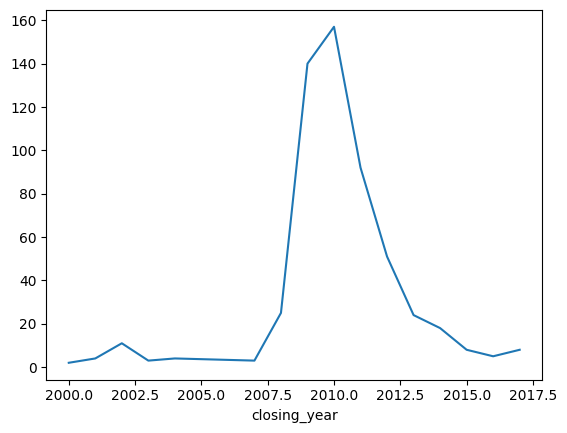

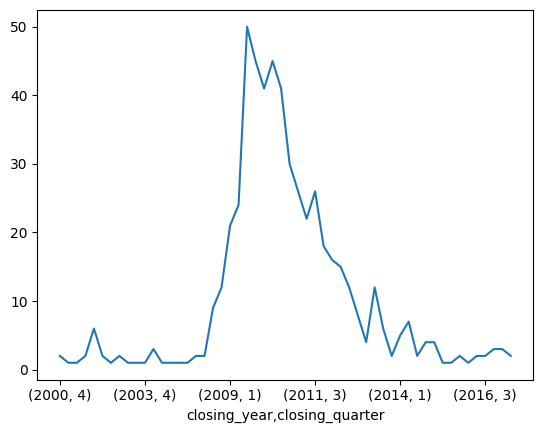

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax = closing_year.plot()
plt.show()

fig, ax = plt.subplots()
ax = closing_year_quarter.plot()
plt.show()

테슬라 주식 데이터로 시간 계산하기


- Quandl 라이브러리의 지원 중단: pandas_datareader 라이브러리는 Quandl API를 사용해 데이터를 가져왔지만, Quandl 자체가 Nasdaq Data Link로 변경되면서, 해당 라이브러리의 지원이 중단되거나, 제대로 동작하지 않을 수 있음.

- 대체 방법 사용 권장: Quandl 데이터를 가져오기 위해 Quandl 공식 라이브러리인 quandl을 사용하는 것이 더 나은 방법. pandas_datareader는 더 이상 Quandl과 직접적으로 연동되지 않으며, 최신 API를 사용하는 것이 중요.



In [37]:
!pip install quandl

In [40]:
import quandl
import pandas as pd

# Quandl API 키 설정
quandl.ApiConfig.api_key = 'QgSux19akmBpF1EWfhhh'

# 데이터 가져오기
tesla  = quandl.get("WIKI/TSLA")
print(tesla.head())
print()
print(type(tesla)) # dataframe으로 저장

             Open     High    Low  Close      Volume  Ex-Dividend  \
Date                                                                
2010-06-29  19.00  25.0000  17.54  23.89  18766300.0          0.0   
2010-06-30  25.79  30.4192  23.30  23.83  17187100.0          0.0   
2010-07-01  25.00  25.9200  20.27  21.96   8218800.0          0.0   
2010-07-02  23.00  23.1000  18.71  19.20   5139800.0          0.0   
2010-07-06  20.00  20.0000  15.83  16.11   6866900.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2010-06-29          1.0      19.00    25.0000     17.54       23.89   
2010-06-30          1.0      25.79    30.4192     23.30       23.83   
2010-07-01          1.0      25.00    25.9200     20.27       21.96   
2010-07-02          1.0      23.00    23.1000     18.71       19.20   
2010-07-06          1.0      20.00    20.0000     15.83       16.11   

            Adj. V

In [41]:
tesla.to_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/tesla_stock_quandl.csv')

In [42]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1949 entries, 2010-06-29 to 2018-03-27
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         1949 non-null   float64
 1   High         1949 non-null   float64
 2   Low          1949 non-null   float64
 3   Close        1949 non-null   float64
 4   Volume       1949 non-null   float64
 5   Ex-Dividend  1949 non-null   float64
 6   Split Ratio  1949 non-null   float64
 7   Adj. Open    1949 non-null   float64
 8   Adj. High    1949 non-null   float64
 9   Adj. Low     1949 non-null   float64
 10  Adj. Close   1949 non-null   float64
 11  Adj. Volume  1949 non-null   float64
dtypes: float64(12)
memory usage: 197.9 KB


In [43]:
# datetime으로 변환
tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/tesla_stock_quandl.csv', parse_dates=[0])
print(tesla.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1949 non-null   datetime64[ns]
 1   Open         1949 non-null   float64       
 2   High         1949 non-null   float64       
 3   Low          1949 non-null   float64       
 4   Close        1949 non-null   float64       
 5   Volume       1949 non-null   float64       
 6   Ex-Dividend  1949 non-null   float64       
 7   Split Ratio  1949 non-null   float64       
 8   Adj. Open    1949 non-null   float64       
 9   Adj. High    1949 non-null   float64       
 10  Adj. Low     1949 non-null   float64       
 11  Adj. Close   1949 non-null   float64       
 12  Adj. Volume  1949 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 198.1 KB
None


In [44]:
print(tesla.loc[(tesla.Date.dt.year == 2010) & (tesla.Date.dt.month == 6)])

        Date   Open     High    Low  Close      Volume  Ex-Dividend  \
0 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0          0.0   
1 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0          0.0   

   Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
0          1.0      19.00    25.0000     17.54       23.89   18766300.0  
1          1.0      25.79    30.4192     23.30       23.83   17187100.0  


### 12.2.1. datetime object와 index - DatetimeIndex

- datetime object를 dataframe index로 설정하여 원하는 시간 데이터 바로 추출

In [50]:
tesla.index = tesla['Date']
print(tesla.index)
print(tesla.iloc[:5, :5])
# tesla.set_index('Date', inplace=True) - date 열이 사라지면서 index 설정


DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-19',
               '2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-26', '2018-03-27'],
              dtype='datetime64[ns]', name='Date', length=1949, freq=None)
                 Date   Open     High    Low  Close
Date                                               
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83
2010-07-01 2010-07-01  25.00  25.9200  20.27  21.96
2010-07-02 2010-07-02  23.00  23.1000  18.71  19.20
2010-07-06 2010-07-06  20.00  20.0000  15.83  16.11


In [59]:
# print(tesla['2015'].iloc[:5, :5]) 오류 발생
tesla_2015 = tesla.loc['2015-01-01':'2015-12-31']
print(tesla_2015.iloc[:5, :5])

                 Date    Open      High       Low    Close
Date                                                      
2015-01-02 2015-01-02  222.87  223.2500  213.2600  219.310
2015-01-05 2015-01-05  214.55  216.5000  207.1626  210.090
2015-01-06 2015-01-06  210.06  214.2000  204.2100  211.280
2015-01-07 2015-01-07  213.35  214.7800  209.7800  210.950
2015-01-08 2015-01-08  212.81  213.7999  210.0100  210.615


### 12.2.2. 시간 간격과 인덱스 - TimedeltaIndex

In [60]:
tesla['ref_date'] = tesla['Date'] - tesla['Date'].min()
print(tesla.head())

                 Date   Open     High    Low  Close      Volume  Ex-Dividend  \
Date                                                                           
2010-06-29 2010-06-29  19.00  25.0000  17.54  23.89  18766300.0          0.0   
2010-06-30 2010-06-30  25.79  30.4192  23.30  23.83  17187100.0          0.0   
2010-07-01 2010-07-01  25.00  25.9200  20.27  21.96   8218800.0          0.0   
2010-07-02 2010-07-02  23.00  23.1000  18.71  19.20   5139800.0          0.0   
2010-07-06 2010-07-06  20.00  20.0000  15.83  16.11   6866900.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2010-06-29          1.0      19.00    25.0000     17.54       23.89   
2010-06-30          1.0      25.79    30.4192     23.30       23.83   
2010-07-01          1.0      25.00    25.9200     20.27       21.96   
2010-07-02          1.0      23.00    23.1000     18.71       19.20   
2010-07-06   

In [61]:
tesla.index = tesla['ref_date']
print(tesla.iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
0 days   2010-06-29  19.00  25.0000  17.54  23.89
1 days   2010-06-30  25.79  30.4192  23.30  23.83
2 days   2010-07-01  25.00  25.9200  20.27  21.96
3 days   2010-07-02  23.00  23.1000  18.71  19.20
7 days   2010-07-06  20.00  20.0000  15.83  16.11


In [63]:
# 최초 5일의 데이터 추출
print(tesla[:'5 days'].iloc[:5, :5])

               Date   Open     High    Low  Close
ref_date                                         
0 days   2010-06-29  19.00  25.0000  17.54  23.89
1 days   2010-06-30  25.79  30.4192  23.30  23.83
2 days   2010-07-01  25.00  25.9200  20.27  21.96
3 days   2010-07-02  23.00  23.1000  18.71  19.20


### 12.2.3. 시간범위와 인덱스
- 데이터를 수집하지 못한 누락일을 포함하여 살펴보고 싶을 때

In [64]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/country_timeseries.csv', parse_dates=[0])
print(ebola.iloc[:5, :5]) # 누락값 존재

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0


In [65]:
print(ebola.iloc[-5:, :5]) # 뒤쪽 데이터 누락 확인

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [66]:
# date_range method
head_range = pd.date_range(start='2014-12-31', end='2015-01-05')
print(head_range)

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')


In [68]:
# 사본 데이터프레임 생성
ebola_5 = ebola.head()
print(ebola_5.iloc[:5, :5])
print()

ebola_5.index = ebola_5['Date'] #datetimeindex 생성
print(ebola_5.iloc[:5, :5])
print()

print(ebola.index)
print()

ebola_5.reindex(head_range)
print(ebola_5.iloc[:5, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2015-01-05 2015-01-05  289        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286           NaN         8157.0                NaN
2014-12-31 2014-12-31  284        2730.0         8115.0             9633.0

RangeIndex(start=0, stop=122, step=1)

                 Date  Day  Cases_Guin

### 12.2.4. 시간범위 수정하고 데이터 밀어내기 - shift method

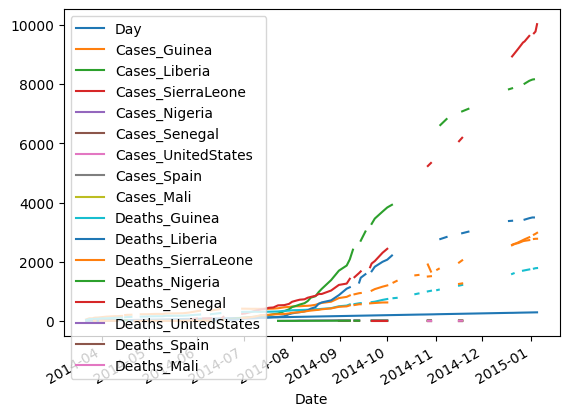

In [70]:
import matplotlib.pyplot as plt

ebola.index = ebola['Date']

fig, ax = plt.subplots()
ax = ebola.iloc[0:, 1:].plot(ax=ax)
ax.legend(loc='upper left')
plt.show()

In [71]:
ebola_sub = ebola[['Day', 'Cases_Guinea', 'Cases_Liberia']]
print(ebola_sub.tail(10))

            Day  Cases_Guinea  Cases_Liberia
Date                                        
2014-04-04   13         143.0           18.0
2014-04-01   10         127.0            8.0
2014-03-31    9         122.0            8.0
2014-03-29    7         112.0            7.0
2014-03-28    6         112.0            3.0
2014-03-27    5         103.0            8.0
2014-03-26    4          86.0            NaN
2014-03-25    3          86.0            NaN
2014-03-24    2          86.0            NaN
2014-03-22    0          49.0            NaN


In [108]:
ebola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kuggle/data/data/country_timeseries.csv', parse_dates=['Date'])
print(ebola.iloc[:5, :5])
print(ebola.iloc[-5:, :5])

        Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0 2015-01-05  289        2776.0            NaN            10030.0
1 2015-01-04  288        2775.0            NaN             9780.0
2 2015-01-03  287        2769.0         8166.0             9722.0
3 2015-01-02  286           NaN         8157.0                NaN
4 2014-12-31  284        2730.0         8115.0             9633.0
          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


In [109]:
ebola.index = ebola['Date']
new_idx = pd.date_range(min(ebola.index), max(ebola.index))

In [110]:
print(new_idx)
new_idx = reversed(new_idx)

DatetimeIndex(['2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31',
               ...
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', length=290, freq='D')


In [111]:
ebola = ebola.reindex(new_idx)
print(ebola.iloc[:5, :5])
print(ebola.iloc[-5:, :5])

                 Date    Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                        
2015-01-05 2015-01-05  289.0        2776.0            NaN            10030.0
2015-01-04 2015-01-04  288.0        2775.0            NaN             9780.0
2015-01-03 2015-01-03  287.0        2769.0         8166.0             9722.0
2015-01-02 2015-01-02  286.0           NaN         8157.0                NaN
2015-01-01        NaT    NaN           NaN            NaN                NaN
                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
Date                                                                      
2014-03-26 2014-03-26  4.0          86.0            NaN                NaN
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN
2014-03-24 2014-03-24  2.0          86.0            NaN                NaN
2014-03-23        NaT  NaN           NaN            NaN                NaN
2014-03-22 

In [112]:
last_valid = ebola.apply(pd.Series.last_valid_index)
print(last_valid)

Date                  2014-03-22
Day                   2014-03-22
Cases_Guinea          2014-03-22
Cases_Liberia         2014-03-27
Cases_SierraLeone     2014-03-27
Cases_Nigeria         2014-07-23
Cases_Senegal         2014-08-31
Cases_UnitedStates    2014-10-01
Cases_Spain           2014-10-08
Cases_Mali            2014-10-22
Deaths_Guinea         2014-03-22
Deaths_Liberia        2014-03-27
Deaths_SierraLeone    2014-03-27
Deaths_Nigeria        2014-07-23
Deaths_Senegal        2014-09-07
Deaths_UnitedStates   2014-10-01
Deaths_Spain          2014-10-08
Deaths_Mali           2014-10-22
dtype: datetime64[ns]


In [113]:
first_valid = ebola.apply(pd.Series.first_valid_index)
print(first_valid)
#

Date                  2015-01-05
Day                   2015-01-05
Cases_Guinea          2015-01-05
Cases_Liberia         2015-01-03
Cases_SierraLeone     2015-01-05
Cases_Nigeria         2014-12-07
Cases_Senegal         2014-12-07
Cases_UnitedStates    2014-12-07
Cases_Spain           2014-12-07
Cases_Mali            2014-12-07
Deaths_Guinea         2015-01-05
Deaths_Liberia        2015-01-03
Deaths_SierraLeone    2015-01-05
Deaths_Nigeria        2014-12-07
Deaths_Senegal        2014-12-07
Deaths_UnitedStates   2014-12-07
Deaths_Spain          2014-12-07
Deaths_Mali           2014-12-07
dtype: datetime64[ns]


In [114]:
earliest_date = ebola.index.min()
print(earliest_date)

2014-03-22 00:00:00


In [115]:
shift_values = last_valid - earliest_date
print(shift_values)

Date                    0 days
Day                     0 days
Cases_Guinea            0 days
Cases_Liberia           5 days
Cases_SierraLeone       5 days
Cases_Nigeria         123 days
Cases_Senegal         162 days
Cases_UnitedStates    193 days
Cases_Spain           200 days
Cases_Mali            214 days
Deaths_Guinea           0 days
Deaths_Liberia          5 days
Deaths_SierraLeone      5 days
Deaths_Nigeria        123 days
Deaths_Senegal        169 days
Deaths_UnitedStates   193 days
Deaths_Spain          200 days
Deaths_Mali           214 days
dtype: timedelta64[ns]


In [116]:
ebola_dict = {}
for idx, col in enumerate(ebola):
  d = shift_values[idx].days
  shifted = ebola[col].shift(d)
  ebola_dict[col] = shifted

<ipython-input-116-a7363186ba3f>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d = shift_values[idx].days


In [118]:
ebola_shift = pd.DataFrame(ebola_dict)
print(ebola_shift.tail())

                 Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
Date                                                                         
2014-03-26 2014-03-26  4.0          86.0            8.0                2.0   
2014-03-25 2014-03-25  3.0          86.0            NaN                NaN   
2014-03-24 2014-03-24  2.0          86.0            7.0                NaN   
2014-03-23        NaT  NaN           NaN            3.0                2.0   
2014-03-22 2014-03-22  0.0          49.0            8.0                6.0   

            Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  \
Date                                                                        
2014-03-26            1.0            NaN                 1.0          1.0   
2014-03-25            NaN            NaN                 NaN          NaN   
2014-03-24            NaN            NaN                 NaN          NaN   
2014-03-23            NaN            NaN                 NaN        

In [119]:
ebola_shift.index = ebola_shift['Day']
ebola_shift = ebola_shift.drop(['Date', 'Day'], axis=1)
print(ebola_shift.tail())

     Cases_Guinea  Cases_Liberia  Cases_SierraLeone  Cases_Nigeria  \
Day                                                                  
4.0          86.0            8.0                2.0            1.0   
3.0          86.0            NaN                NaN            NaN   
2.0          86.0            7.0                NaN            NaN   
NaN           NaN            3.0                2.0            NaN   
0.0          49.0            8.0                6.0            0.0   

     Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
Day                                                               
4.0            NaN                 1.0          1.0         NaN   
3.0            NaN                 NaN          NaN         NaN   
2.0            NaN                 NaN          NaN         NaN   
NaN            NaN                 NaN          NaN         NaN   
0.0            1.0                 1.0          1.0         1.0   

     Deaths_Guinea  Deaths_Liberia  Dea

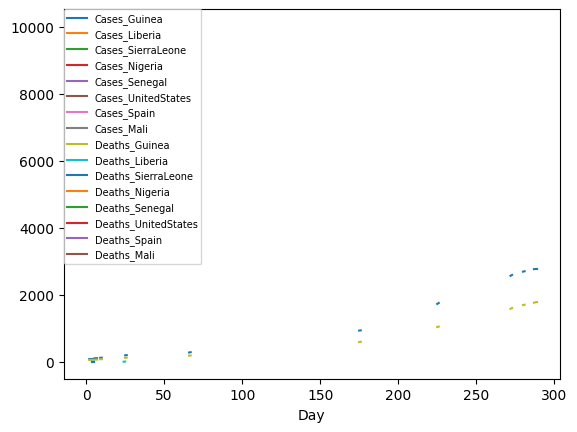

In [120]:
fig, ax = plt.subplots()
ax = ebola_shift.iloc[:, :].plot(ax=ax)
ax.legend(fontsize=7, loc=2, borderaxespad=0.)
plt.show()